In [1]:
import torch
pytorch_version = f"torch-{torch.__version__}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric pymatgen tqdm

Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 9.4 MB 33.8 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 4.5 MB 30.4 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 3.2 MB 22.9 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 873 kB 29.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 19.1 MB/s 
     |████████████████████████████████| 2.6 MB 58.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 280 kB 80.2 MB/s 
     |████████████████

# 1. Basic Graph Example

![https://pytorch-geometric.readthedocs.io](https://raw.githubusercontent.com/pyg-team/pyg_sphinx_theme/master/pyg_sphinx_theme/static/img/pyg_logo.png)

In [2]:
import torch
from torch_geometric.data import Data

In [3]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long) # Adjacency matrix
x = torch.tensor([[-1], [0], [1]], dtype=torch.float) # Node features
 
data = Data(x=x, edge_index=edge_index) # Base class for graph representation

In [4]:
data

Data(x=[3, 1], edge_index=[2, 4])

![Graph](https://pytorch-geometric.readthedocs.io/en/latest/_images/graph.svg)

In [5]:
print(data.x) # Node features

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [6]:
print(data.edge_attr) # Edge features

None


In [7]:
print(data.edge_index.t()) # Adjacency matrix

tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1]])


In [8]:
print(f'Number of node features: {data.num_node_features}')
print(f'Number of edge features: {data.num_edge_features}')

Number of node features: 1
Number of edge features: 0


In [9]:
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')

Contains isolated nodes: False
Contains self-loops: False


# 2. Dataset



In [10]:
from torch_geometric.data import Dataset
from torch_geometric.datasets import TUDataset

**ENZYMES**

**ENZYMES** is a dataset of 600 protein tertiary structures obtained from the BRENDA enzyme database. The ENZYMES dataset contains 6 enzymes.

Source:  [When Work Matters: Transforming Classical Network Structures to Graph CNN](https://arxiv.org/abs/1807.02653)

In [11]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [12]:
dataset

ENZYMES(600)

In [13]:
print(f"Total number of entries: {len(dataset)}")
print(f'Number of node features: {dataset.num_node_features}')
print(f'Number of edge features: {dataset.num_edge_features}')
print(f'Number of classes: {dataset.num_classes}')

Total number of entries: 600
Number of node features: 21
Number of edge features: 0
Number of classes: 6


In [14]:
data = dataset[0]

In [15]:
data

Data(edge_index=[2, 168], x=[37, 21], y=[1])

In [16]:
dataset = dataset.shuffle()
train_set = dataset[:400]
test_set = dataset[400:]

# 3. Mini-batches

In [17]:
from torch_geometric.loader import DataLoader

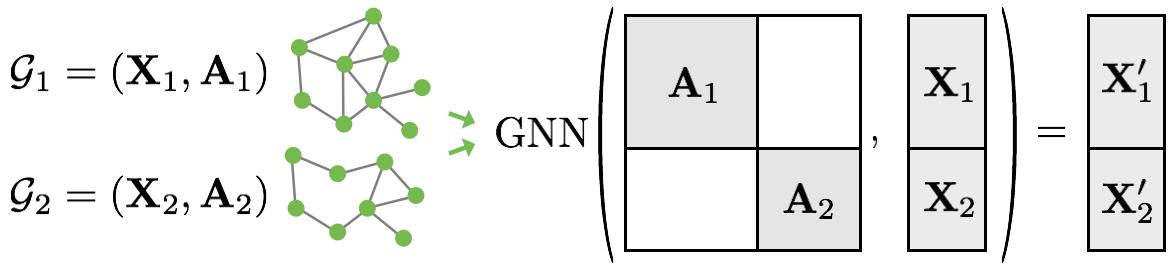

$$\begin{split}\mathbf{A} = \begin{bmatrix} \mathbf{A}_1 & & \\ & \ddots & \\ & & \mathbf{A}_n \end{bmatrix}, \qquad \mathbf{X} = \begin{bmatrix} \mathbf{X}_1 \\ \vdots \\ \mathbf{X}_n \end{bmatrix}, \qquad \mathbf{Y} = \begin{bmatrix} \mathbf{Y}_1 \\ \vdots \\ \mathbf{Y}_n \end{bmatrix}\end{split}$$

In [18]:
loader = DataLoader(train_set, batch_size=32, shuffle=True)

In [19]:
for batch in loader:
    break
print(batch)
print("Num graphs in a batch:", batch.num_graphs)

DataBatch(edge_index=[2, 3722], x=[939, 21], y=[32], batch=[939], ptr=[33])
Num graphs in a batch: 32


In [20]:
print(batch.batch)
print(batch.batch.shape)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6, 

# 4. Simple GCN

## 4.1. GCN Convolution

$$\mathbf{x}^{\prime}_i = \mathbf{\Theta} \sum_{j \in \mathcal{N}(v) \cup
\{ i \}} \frac{e_{j,i}}{\sqrt{\hat{d}_j \hat{d}_i}} \mathbf{x}_j$$

## 4.2. Simple Graph Convolutional Net

In [21]:
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv, global_mean_pool, BatchNorm


class SimpleGCNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(SimpleGCNet, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.bn3 = BatchNorm(hidden_channels, )
        self.lin = Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, batch_index):

        # Step 1. Graph Convolutions

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.bn2(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.bn3(x)

        # Step 2. Global Pooling

        x = global_mean_pool(x, batch_index)

        # Step 3. Classification
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        x = F.softmax(x, dim=1)
        return x

In [22]:
model = SimpleGCNet(in_channels=dataset.num_node_features,
                    hidden_channels=64,
                    out_channels=dataset.num_classes)
print(model)

SimpleGCNet(
  (conv1): GCNConv(21, 64)
  (bn1): BatchNorm(64)
  (conv2): GCNConv(64, 64)
  (bn2): BatchNorm(64)
  (conv3): GCNConv(64, 64)
  (bn3): BatchNorm(64)
  (lin): Linear(in_features=64, out_features=6, bias=True)
)


## 4.3. Training

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleGCNet(in_channels=dataset.num_node_features, 
                    hidden_channels=42,
                    out_channels=dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-3)
criterion = torch.nn.CrossEntropyLoss()

In [24]:
bs = 16
dataset = dataset.shuffle()
train_set = dataset[:400]
validation_set = dataset[400:500]
test_set = dataset[500:]
train_loader = DataLoader(train_set, batch_size=bs, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [25]:
def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
        data.to(device)
        out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
        loss = criterion(out, data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def validate(loader):
    model.eval()

    loss = 0
    with torch.no_grad():
        for data in loader:  # Iterate in batches over the training/test dataset.
            data.to(device)
            out = model(data.x, data.edge_index, data.batch)  
            loss += criterion(out, data.y)   # Check against ground-truth labels.
        return loss / len(loader)  # Derive ratio of correct predictions.

In [26]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

train_losses = []
validation_losses = []
for epoch in range(1, 401):
    train()
    train_loss = validate(train_loader)
    validation_loss = validate(validation_loader)
    if epoch % 10 == 0:
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)
        print(f'Epoch: {epoch:03d}, Train Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 010, Train Loss: 1.7898, Validation Loss: 1.7841
Epoch: 020, Train Loss: 1.7646, Validation Loss: 1.7627
Epoch: 030, Train Loss: 1.8561, Validation Loss: 1.9358
Epoch: 040, Train Loss: 1.7711, Validation Loss: 1.7766
Epoch: 050, Train Loss: 1.7594, Validation Loss: 1.7795
Epoch: 060, Train Loss: 1.7946, Validation Loss: 1.7796
Epoch: 070, Train Loss: 1.7658, Validation Loss: 1.7751
Epoch: 080, Train Loss: 1.7611, Validation Loss: 1.7753
Epoch: 090, Train Loss: 1.7622, Validation Loss: 1.7779
Epoch: 100, Train Loss: 1.7980, Validation Loss: 1.7850
Epoch: 110, Train Loss: 1.7856, Validation Loss: 1.7898
Epoch: 120, Train Loss: 1.7905, Validation Loss: 1.7924
Epoch: 130, Train Loss: 1.7905, Validation Loss: 1.7958
Epoch: 140, Train Loss: 1.7904, Validation Loss: 1.7964
Epoch: 150, Train Loss: 1.7904, Validation Loss: 1.8003
Epoch: 160, Train Loss: 1.7919, Validation Loss: 1.7936
Epoch: 170, Train Loss: 1.7905, Validation Loss: 1.7973
Epoch: 180, Train Loss: 1.7920, Validation Loss:

In [27]:
train_losses = torch.tensor(train_losses).numpy()
validation_losses = torch.tensor(validation_losses).numpy()

In [28]:
import matplotlib.pyplot as plt
import numpy as np

[]

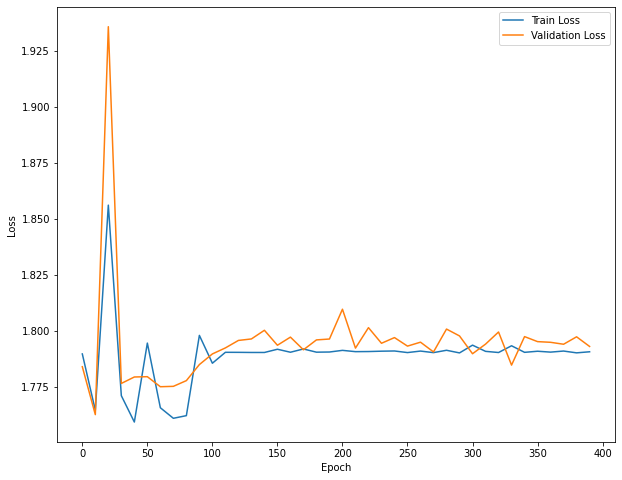

In [29]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(train_losses))*10, train_losses, label='Train Loss')
plt.plot(np.arange(len(validation_losses))*10, validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.plot()

In [30]:
accuracy = 0
with torch.no_grad():
    for data in loader: 
        data.to(device)
        out = model(data.x, data.edge_index, data.batch) 
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        accuracy += (pred == data.y).sum().item()
accuracy = accuracy / len(loader.dataset)
print(f'Test accuracy: {accuracy*100} %')

Test accuracy: 17.75 %


In [31]:
model = SimpleGCNet(in_channels=dataset.num_node_features, 
                    hidden_channels=70,
                    out_channels=dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-3)

bs = 32
dataset = dataset.shuffle()
train_set = dataset[:400]
validation_set = dataset[400:500]
test_set = dataset[500:]
train_loader = DataLoader(train_set, batch_size=bs, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_set, batch_size=bs, shuffle=True)

train_losses = []
validation_losses = []
for epoch in range(1, 401):
    train()
    train_loss = validate(train_loader)
    validation_loss = validate(validation_loader)
    if epoch % 10 == 0:
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)
        print(f'Epoch: {epoch:03d}, Train Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}')

accuracy = 0
with torch.no_grad():
    for data in loader: 
        data.to(device)
        out = model(data.x, data.edge_index, data.batch) 
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        accuracy += (pred == data.y).sum().item()
accuracy = accuracy / len(loader.dataset)
print(f'Test accuracy: {accuracy*100} %')

Epoch: 010, Train Loss: 1.7076, Validation Loss: 1.7239
Epoch: 020, Train Loss: 1.7307, Validation Loss: 1.7510
Epoch: 030, Train Loss: 1.8065, Validation Loss: 1.7792
Epoch: 040, Train Loss: 1.8171, Validation Loss: 1.8175
Epoch: 050, Train Loss: 1.8055, Validation Loss: 1.7887
Epoch: 060, Train Loss: 1.7514, Validation Loss: 1.7554
Epoch: 070, Train Loss: 1.7209, Validation Loss: 1.7306
Epoch: 080, Train Loss: 1.6536, Validation Loss: 1.6696
Epoch: 090, Train Loss: 1.8199, Validation Loss: 1.8196
Epoch: 100, Train Loss: 1.8324, Validation Loss: 1.8221
Epoch: 110, Train Loss: 1.7511, Validation Loss: 1.7435
Epoch: 120, Train Loss: 1.8095, Validation Loss: 1.7862
Epoch: 130, Train Loss: 1.7412, Validation Loss: 1.7285
Epoch: 140, Train Loss: 1.7453, Validation Loss: 1.7251
Epoch: 150, Train Loss: 1.7118, Validation Loss: 1.7204
Epoch: 160, Train Loss: 1.6842, Validation Loss: 1.6877
Epoch: 170, Train Loss: 1.8118, Validation Loss: 1.7909
Epoch: 180, Train Loss: 1.6812, Validation Loss:

In [32]:
model = SimpleGCNet(in_channels=dataset.num_node_features, 
                    hidden_channels=70,
                    out_channels=dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=5e-3)

bs = 32
dataset = dataset.shuffle()
train_set = dataset[:400]
validation_set = dataset[400:500]
test_set = dataset[500:]
train_loader = DataLoader(train_set, batch_size=bs, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_set, batch_size=bs, shuffle=True)

train_losses = []
validation_losses = []
for epoch in range(1, 401):
    train()
    train_loss = validate(train_loader)
    validation_loss = validate(validation_loader)
    if epoch % 10 == 0:
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)
        print(f'Epoch: {epoch:03d}, Train Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}')

accuracy = 0
with torch.no_grad():
    for data in loader: 
        data.to(device)
        out = model(data.x, data.edge_index, data.batch) 
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        accuracy += (pred == data.y).sum().item()
accuracy = accuracy / len(loader.dataset)
print(f'Test accuracy: {accuracy*100} %')

Epoch: 010, Train Loss: 1.6558, Validation Loss: 1.7211
Epoch: 020, Train Loss: 1.5831, Validation Loss: 1.6750
Epoch: 030, Train Loss: 1.5465, Validation Loss: 1.6033
Epoch: 040, Train Loss: 1.5083, Validation Loss: 1.5746
Epoch: 050, Train Loss: 1.4889, Validation Loss: 1.6004
Epoch: 060, Train Loss: 1.4732, Validation Loss: 1.6043
Epoch: 070, Train Loss: 1.4577, Validation Loss: 1.6289
Epoch: 080, Train Loss: 1.4298, Validation Loss: 1.6088
Epoch: 090, Train Loss: 1.4081, Validation Loss: 1.5933
Epoch: 100, Train Loss: 1.4468, Validation Loss: 1.5995
Epoch: 110, Train Loss: 1.4693, Validation Loss: 1.6325
Epoch: 120, Train Loss: 1.3870, Validation Loss: 1.5572
Epoch: 130, Train Loss: 1.4003, Validation Loss: 1.6723
Epoch: 140, Train Loss: 1.3454, Validation Loss: 1.6704
Epoch: 150, Train Loss: 1.4087, Validation Loss: 1.5794
Epoch: 160, Train Loss: 1.3749, Validation Loss: 1.6298
Epoch: 170, Train Loss: 1.3994, Validation Loss: 1.5864
Epoch: 180, Train Loss: 1.3190, Validation Loss: